### Assignment 1. Linear Regression

In [1]:
import os
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#### 1. Загрузите набор данных ex1data1.txt из текстового файла.

In [2]:
data = np.loadtxt('data/Lab 1/ex1data1.txt', delimiter=',')
X = data[:, 0]
y = data[:, 1]
m = len(y)
y = y.reshape((m, 1))

#### 2. Постройте график зависимости прибыли ресторана от населения города, в котором он расположен.

In [3]:
def plotData(x, y):
    '''
    PLOTDATA Plots the data points x and y into a new figure 
    PLOTDATA(x,y) plots the data points and gives the figure axes labels of
    population and profit.
    '''
    plt.plot(x, y, 'rx', LineWidth=1)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    

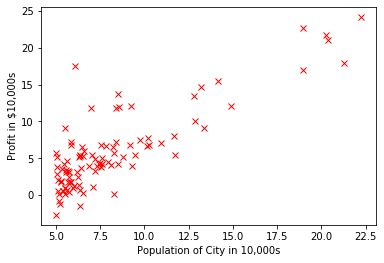

In [4]:
plotData(X,y)

#### 3. Реализуйте функцию потерь J(θ) для набора данных ex1data1.txt.

In [5]:
def computeCost(X, y, theta):
    '''
    COMPUTECOST Compute cost for linear regression
    J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    '''
    m = len(y)
    return np.sum(np.square(X.dot(theta) - y)) / (2 * m)

#### 4. Реализуйте функцию градиентного спуска для выбора параметров модели. Постройте полученную модель (функцию) совместно с графиком из пункта 2

In [6]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''
    GRADIENTDESCENT Performs gradient descent to learn theta
    theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    '''
    m = len(y)
    y = y.reshape(m, 1)
    J_history = np.zeros((num_iters, 1), dtype='int')
    for itera in range(num_iters):
        temp1 = sum(np.dot(X, theta) - y) / m
        temp2 = np.dot((np.dot(X, theta) - y).T, X[:, 1]) / m
        theta[0] -= alpha * temp1
        theta[1] -= alpha * temp2
        J_history[itera] = computeCost(X, y, theta)
    
    return theta, J_history

Cost is 32.072734
Cost is 54.242455

Running Gradient Descent ...

Theta found by gradient descent:

[[-3.63029144]
 [ 1.16636235]] 



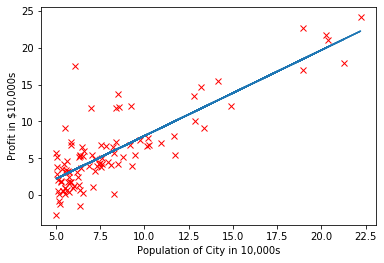

In [7]:
X = np.concatenate((np.ones((m, 1), dtype='float'), data[:, 0:1]), axis=1)
theta = np.zeros((2, 1), dtype='float')

# Some gradient descent settings
iterations = 1500
alpha = 0.01

# compute and display initial cost
J = computeCost(X, y, theta)
print('Cost is %f' % J)  # 32.07

J = computeCost(X, y, np.array([(-1), (2)]).reshape((2, 1)))
print('Cost is %f' % J)  # 54.24

print('\nRunning Gradient Descent ...\n')
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
print('Theta found by gradient descent:\n')
print(theta, '\n')

plotData(X[:, 1], y)
plt.plot(X[:, 1], np.dot(X, theta), '-') # Plot the linear fit
plt.show()

#### 5. Постройте трехмерный график зависимости функции потерь от параметров модели (θ0 и θ1) как в виде поверхности, так и в виде изолиний (contour plot).

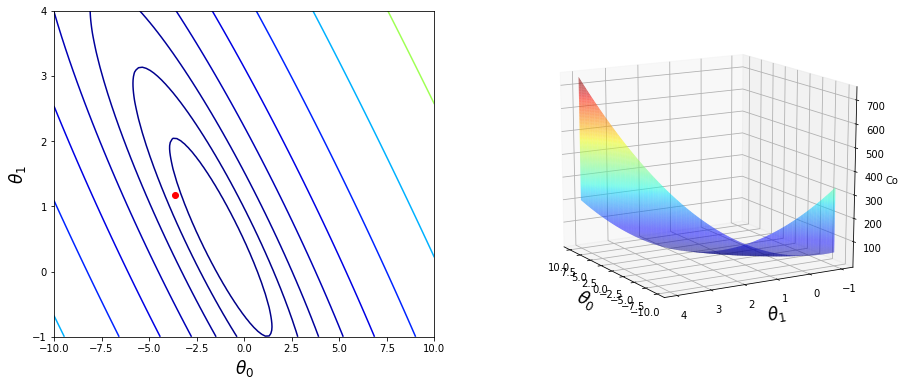

In [8]:
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

J_vals = np.zeros((len(theta0_vals), len(theta1_vals)), dtype='float')

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = np.array([(theta0_vals[i]), (theta1_vals[j])]).reshape((2, 1))
        J_vals[i][j] = computeCost(X, y, t)

fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
ax1.contour(theta0_vals, theta1_vals, J_vals,
            np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0], theta[1], c='r')

# Right plot
ax2.plot_surface(theta0_vals, theta1_vals, J_vals,
                 rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(J_vals.min(), J_vals.max())
ax2.view_init(elev=15, azim=150)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

#### 6. Загрузите набор данных ex1data2.txt из текстового файла.

In [9]:
data = np.loadtxt('data/Lab 1/ex1data2.txt', delimiter=',')
X = data[:, 0:2]
y = data[:, 2]
m = len(y)

#### 8. Реализуйте функции потерь J(θ) и градиентного спуска для случая многомерной линейной регрессии с использованием векторизации.

In [10]:
def computeCostMulti(X, y, theta):
    m = len(y)
    return sum(np.power(np.subtract(X @ theta, y), 2)) / (2 * m)

In [11]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    X = deepcopy(X)
    y = deepcopy(y)
    theta = deepcopy(theta)
    m = len(y)
    y = y.reshape(m, 1)
    J_history = np.zeros((num_iters, 1), dtype='float')
    for itera in range(num_iters):
        temp1 = sum(X @ theta - y) / m
        temp2 = (X @ theta - y).T @ X[:, 1] / m
        temp3 = (X @ theta - y).T @ X[:, 2] / m
        theta[0] -= alpha * temp1
        theta[1] -= alpha * temp2
        theta[2] -= alpha * temp3
        J_history[itera] = computeCostMulti(X, y, theta)

    return theta, J_history

#### 7. Произведите нормализацию признаков. Повлияло ли это на скорость сходимости градиентного спуска? Ответ дайте в виде графика.

In [12]:
def featureNormalize(X):
    X_norm = deepcopy(X)
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    m = np.shape(X)[0]
    for i in range(m):
        X_norm[i] = np.divide(X_norm[i] - mu, sigma)
    return X_norm, mu, sigma


In [13]:
X_norm, mu, sigma = featureNormalize(X)

# Add intercept term to X
X = np.concatenate([np.ones((m, 1), dtype='float'), X], axis=1)
X_norm = np.concatenate([np.ones((m, 1), dtype='float'), X_norm], axis=1)

/Users/konstantin/PycharmProjects/machine-learning-course/env/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


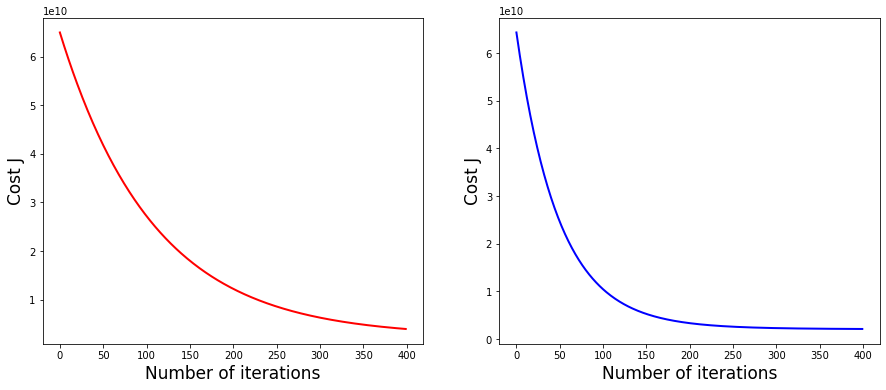

In [14]:
# Choose some alpha value
num_iters = 400

# Init Theta and Run Gradient Descent
theta = np.zeros((3, 1), dtype='float')
_, J_history = gradientDescentMulti(X, y, theta, 0.000000001, num_iters)
_, J_history_norm = gradientDescentMulti(X_norm, y, theta, 0.01, num_iters)

# Plot the convergence graph
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.plot(range(num_iters), J_history, '-r', LineWidth=2)
ax2.plot(range(num_iters), J_history_norm, '-b', LineWidth=2)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel('Number of iterations', fontsize=17)
    ax.set_ylabel('Cost J', fontsize=17)

fig.show()

#### 9. Покажите, что векторизация дает прирост производительности.

#### 10. Попробуйте изменить параметр ɑ (коэффициент обучения). Как при этом изменяется график функции потерь в зависимости от числа итераций градиентного спуск? Результат изобразите в качестве графика.

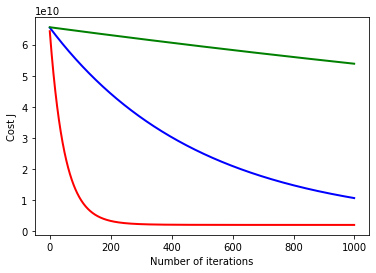

In [16]:
# Choose some alpha value
num_iters = 1000

# Init Theta and Run Gradient Descent
theta = np.zeros((3, 1), dtype='float')
[_, J_history1] = gradientDescentMulti(X_norm, y, theta, 0.01, num_iters)
[_, J_history2] = gradientDescentMulti(X_norm, y, theta, 0.001, num_iters)
[_, J_history3] = gradientDescentMulti(X_norm, y, theta, 0.0001, num_iters)

# Plot the convergence graph
plt.plot(range(num_iters), J_history1, '-r', LineWidth=2)
plt.plot(range(num_iters), J_history2, '-b', LineWidth=2)
plt.plot(range(num_iters), J_history3, '-g', LineWidth=2)

plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

#### 11. Постройте модель, используя аналитическое решение, которое может быть получено методом наименьших квадратов. Сравните результаты данной модели с моделью, полученной с помощью градиентного спуска.

In [17]:
def normalEqn(X, y):
    return np.linalg.inv(X.T @ X) @ X.T @ y

In [24]:
normal_eqn_theta = normalEqn(X, y)
theta = np.zeros((3, 1), dtype='float')
[gradient_descent_theta, _] = gradientDescentMulti(X, y, theta, 0.00000001, 100000)
print('Normal eqn theta', normal_eqn_theta)
print('Normal eqn cost', computeCostMulti(X, y, normal_eqn_theta))
print('Gradient descent theta', gradient_descent_theta.T[0])
print('Gradient descent cost', computeCostMulti(X, y, gradient_descent_theta.T[0]))

Normal eqn theta [89597.9095428    139.21067402 -8738.01911233]
Normal eqn cost 2043280050.6028283
Gradient descent theta [  9.60217461 165.35476462  16.82571503]
Gradient descent cost 2397495120.507837
